# Data Science 207 - Introduction to Machine Learning
## Final Project for Team 4 / Section 4 / Fall 2023

__Team Members__
- Arias, Nathan (ihsiukao@berkeley.edu)
- Houghton, Douglas (ihsiukao@berkeley.edu)
- Kao, I-Hsiu (ihsiukao@berkeley.edu)

### 1. Load Packages and Data

In [1]:
# Standard Data Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt

In [2]:
# Load data files.
metadata = pd.read_csv('HAM10000_metadata.csv')
rgb_data = pd.read_csv('hmnist_28_28_RGB.csv')

### 2. Samples and Features

In [3]:
metadata.shape

(10015, 7)

In [4]:
metadata.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
rgb_data.shape

(10015, 2353)

The metadata file is expected to have ancillary informaiton regarding the patient as well as identify images by name for each record.

In [6]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


The RGB file is expected to have the per pixel RGB value for the 28x28 sized images across each the of the RGB channels (totalling 2352 values per image). Addtionally, these records are expected to include the label data for each image.

In [7]:
rgb_data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


### 3. Merge, Shuffle, and Split

In [8]:
# Merge metadata and rgb values.
meta_set = pd.concat([metadata, rgb_data["label"]], axis=1, join="inner")
meta_set = meta_set[["age", "sex", "localization", "label"]]

if meta_set.isnull().sum().sum() > 0:
    meta_set = meta_set.dropna()

indices = np.arange(meta_set.shape[0])

np.random.seed(0)

meta_set = meta_set.sample(frac = 1)


In [9]:
display(meta_set.shape)
display(meta_set.head())

(9958, 4)

,age,sex,localization,label
7141,50.0,male,upper extremity,4
3628,40.0,male,foot,4
2619,60.0,female,face,1
3868,45.0,female,trunk,4
1605,70.0,male,abdomen,6


In [10]:
splits = np.multiply(len(meta_set), (0.6, 0.2, 0.2)).astype(int)
train_set, val_set, test_set = np.split(meta_set, [splits[0], splits[0]+splits[1]])

/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
train_set.reset_index(drop=True, inplace=True)
val_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)
display(train_set.shape)
display(val_set.shape)
display(test_set.shape)
display(train_set.head())
display(val_set.head())
display(test_set.head())

(5974, 4)

(1991, 4)

(1993, 4)

,age,sex,localization,label
0,50.0,male,upper extremity,4
1,40.0,male,foot,4
2,60.0,female,face,1
3,45.0,female,trunk,4
4,70.0,male,abdomen,6


,age,sex,localization,label
0,50.0,female,chest,1
1,35.0,female,trunk,4
2,85.0,male,face,6
3,35.0,male,lower extremity,4
4,65.0,female,chest,1


,age,sex,localization,label
0,45.0,female,back,4
1,85.0,female,upper extremity,0
2,50.0,male,back,4
3,65.0,male,back,6
4,45.0,female,trunk,4


In [12]:
train_features = train_set[["age", "sex", "localization"]]
train_labels = train_set["label"]
val_features = val_set[["age", "sex", "localization"]]
val_labels = val_set["label"]
test_features = test_set[["age", "sex", "localization"]]
test_labels = test_set["label"]

### 4. Majority Baseline

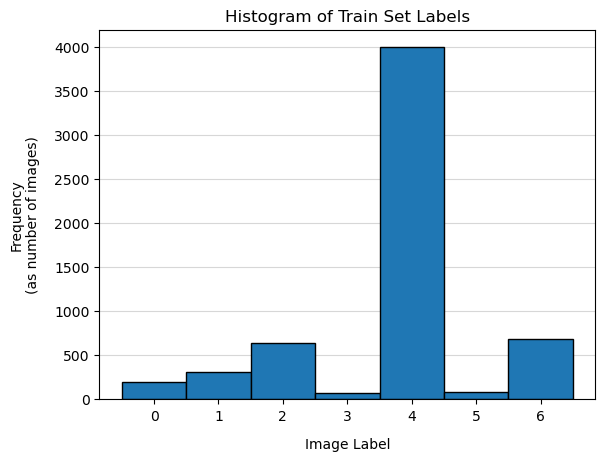

In [13]:
#check which label has the highest occurance

fig = train_set.label.hist(grid = False, bins = np.arange(8) - 0.5, edgecolor = 'black', zorder = 2.5)

fig.set_ylabel('Frequency\n(as number of images)', labelpad=10)
fig.set_xlabel('Image Label', labelpad=10)
fig.set_title("Histogram of Train Set Labels")

fig.grid(axis='y', visible=True, alpha=0.5, zorder=2.6)

In [14]:
#label 4 has the highest counts

def majority_baseline(x):
    """
    Baseline model based on majority counts
    Return 4
    """
    return 4

In [15]:
#get predictions for train and validation set
train_maj_baseline_pred = train_features.apply(majority_baseline, axis = 1)
val_maj_baseline_pred = val_features.apply(majority_baseline, axis = 1)

#calculate predictions accuracy
maj_train_accuracy = np.sum(train_maj_baseline_pred == train_labels) / len(train_labels)
maj_val_accuracy = np.sum(val_maj_baseline_pred == val_labels) / len(val_labels)

print("majority baseline train accuracy:", maj_train_accuracy)
print("majority baseline test accuracy:", maj_val_accuracy)

majority baseline train accuracy: 0.6695681285570807
majority baseline test accuracy: 0.66449020592667


### 5. Rule Baseline: Sex

Text(0.5, 1.0, 'Female Label Distribution')

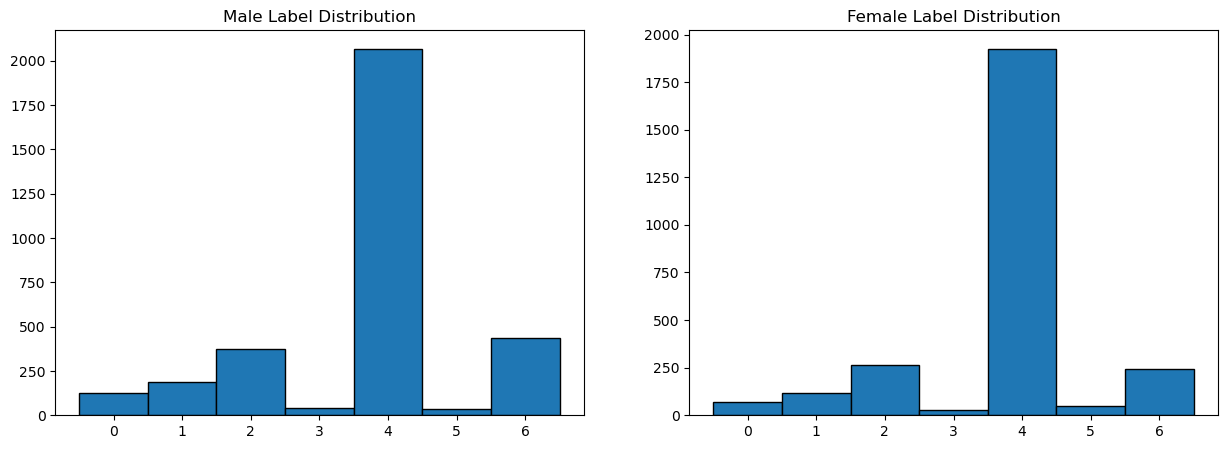

In [16]:
#check label occurances for both sex
chart_ticks, chart_labels = [], []

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].hist(x = train_set[train_set.sex == "male"].label, bins = np.arange(8)-0.5, edgecolor='black', zorder=2.5)
axes[0].set_title('Male Label Distribution')
axes[1].hist(x = train_set[train_set.sex == "female"].label, bins = np.arange(8)-0.5, edgecolor='black', zorder=2.5)
axes[1].set_title('Female Label Distribution')

In [17]:
def sex_rule_baseline(x):
    """
    Baseline model based on sex
    Return 4 for both sex
    """
    if x.sex == "male":
        return 4
    elif x.sex == "female":
        return 4

In [18]:
#get predictions for train and validation set
train_sex_baseline_pred = train_features.apply(sex_rule_baseline, axis = 1)
val_sex_baseline_pred = val_features.apply(sex_rule_baseline, axis = 1)

#calculate accuracy
sex_train_accuracy = np.sum(train_sex_baseline_pred == train_labels) / len(train_labels)
sex_val_accuracy = np.sum(val_sex_baseline_pred == val_labels) / len(val_labels)

print("majority baseline train accuracy:", sex_train_accuracy)
print("majority baseline test accuracy:", sex_val_accuracy)

majority baseline train accuracy: 0.668563776364245
majority baseline test accuracy: 0.6634856855851331


In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

### 6. Model 1: Age

In [20]:
def build_model1(learning_rate = 0.01):
    """
    build model using age as a single value
    """
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    #add input layer
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float32, name = "Age")
    
    #add output layer
    dx = tf.keras.layers.Dense(units = 7, activation = "softmax", name = "Dx")(age)
    
    #configure model
    model = tf.keras.Model(inputs = age, outputs = dx, name = "model1")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [21]:
model1 = build_model1()
model1.summary()

#train model using train and validation set
history = model1.fit(
    x = train_features[["age"]],
    y = train_labels,
    epochs = 10,
    batch_size = 32,
    validation_data = (
        val_features[["age"]],
        val_labels),
    verbose = 0)

history = pd.DataFrame(history.history)
display(history)

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Age (InputLayer)            [(None, 1)]               0         
                                                                 
 Dx (Dense)                  (None, 7)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


2023-12-09 00:40:45.129568: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


,loss,accuracy,val_loss,val_accuracy
0,7.407344,0.446435,5.070949,0.664490
1,6.576320,0.453130,14.331371,0.106479
2,6.836175,0.442919,3.545403,0.664490
3,6.375101,0.457650,4.640981,0.021095
4,6.596050,0.447104,5.557395,0.064792
5,6.858734,0.442585,9.424006,0.664490
6,6.717806,0.450117,8.506036,0.664490
7,7.006474,0.442082,8.180515,0.664490
8,6.706966,0.461500,7.193553,0.664490
9,6.781004,0.450954,13.084544,0.664490


In [22]:
#display correlation between age and label
train_set[["age", "label"]].corr()

,age,label
age,1.000000,-0.209105
label,-0.209105,1.000000


#### the model's validation accuracy is not any better than our baseline model. One reason may be that age is not highly correlated to label

### 7. Model 2: Age Bascket

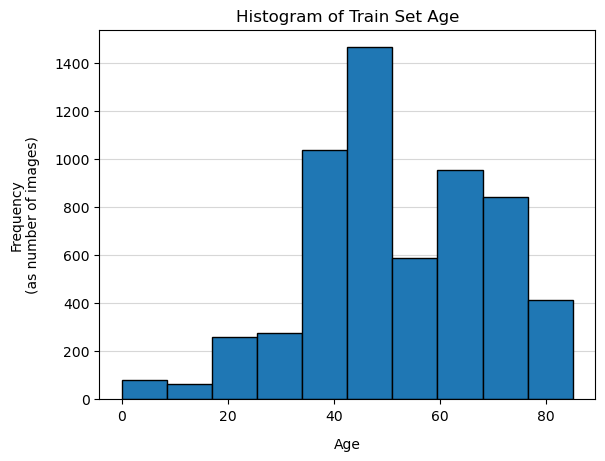

In [23]:
#check distribution of age

fig = train_set.age.hist(grid = False, edgecolor = 'black', zorder = 2.5)

# Update presentation and format.
fig.set_ylabel('Frequency\n(as number of images)', labelpad=10)
fig.set_xlabel('Age', labelpad=10)
fig.set_title("Histogram of Train Set Age")

fig.grid(axis='y', visible=True, alpha=0.5, zorder=2.6)

In [24]:
def build_model2(learning_rate = 0.01):
    """
    build model using age in buckets
    """
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    #add input layer
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float32, name = "Age")
    
    #create age buckets
    age_bins = [0.1, 10, 20, 30, 40, 50, 60, 70, 80]
    
    #bucket age in to corresponding buckets
    age_binned = tf.keras.layers.Discretization(bin_boundaries = age_bins)(age)
    
    #create one-hot encoding for age buckets
    age_id = tf.keras.layers.IntegerLookup(
        vocabulary = np.arange(0, len(age_bins) + 1),
        output_mode = "one_hot")(age_binned)
    
    #add output layer
    dx = tf.keras.layers.Dense(units = 7, activation = "softmax", name = "Dx")(age_id)
    
    model = tf.keras.Model(inputs = age, outputs = dx, name = "model2")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [25]:
model2 = build_model2()
model2.summary()

#train model
history = model2.fit(
    x = train_features[["age"]],
    y = train_labels,
    epochs = 15,
    batch_size = 32,
    validation_data = (
        val_features[["age"]],
        val_labels),
    verbose = 0)

history = pd.DataFrame(history.history)
display(history)

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Age (InputLayer)            [(None, 1)]               0         
                                                                 
 discretization (Discretizat  (None, 1)                0         
 ion)                                                            
                                                                 
 integer_lookup (IntegerLook  (None, 11)               0         
 up)                                                             
                                                                 
 Dx (Dense)                  (None, 7)                 84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


,loss,accuracy,val_loss,val_accuracy
0,1.576189,0.564446,1.364643,0.676042
1,1.290735,0.669903,1.208463,0.664490
2,1.188920,0.669568,1.151008,0.664490
3,1.147175,0.669568,1.123686,0.664490
4,1.125253,0.669568,1.106815,0.664490
5,1.110869,0.669568,1.094318,0.664490
6,1.100146,0.669568,1.084233,0.664490
7,1.091626,0.669568,1.075878,0.664490
8,1.084584,0.669568,1.068762,0.664490
9,1.078648,0.669568,1.062711,0.664490


### 8. Model 3: Age Bascket & Sex

In [26]:
def build_model3(learning_rate = 0.01):
    """
    build model using age in buckets and sex
    """
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    #add input layer for age
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float32, name = "Age")
    
    #add input layer for sex
    sex = tf.keras.layers.Input(shape = (1, ), dtype = tf.string, name = "Sex")
    
    #create age buckets
    age_bins = [0.1, 10, 20, 30, 40, 50, 60, 70, 80]
    
    #bucket age into corresponding bucket
    age_binned = tf.keras.layers.Discretization(bin_boundaries = age_bins)(age)
    
    #create one-hot encoding for age buckets
    age_id = tf.keras.layers.IntegerLookup(
        vocabulary = np.arange(0, len(age_bins) + 1),
        output_mode = "one_hot")(age_binned)
    
    #create one-hot encoding for sex
    sex_id = tf.keras.layers.StringLookup(vocabulary = ["male", "female"], output_mode = "one_hot")(sex)
    
    #add layer to concatenate inputs
    features = tf.keras.layers.Concatenate()([age_id, sex_id])
    
    #add output layer
    dx = tf.keras.layers.Dense(units = 7, activation = "softmax", name = "Dx")(features)
    
    model = tf.keras.Model(inputs = [age, sex], outputs = dx, name = "model3")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [27]:
model3 = build_model3()
model3.summary()

history = model3.fit(
    x = {
        "Age": train_features[["age"]],
        "Sex": train_features[["sex"]]
    },
    y = train_labels,
    epochs = 15,
    batch_size = 32,
    validation_data = (
        {
            "Age": val_features[["age"]],
            "Sex": val_features[["sex"]]
        },
        val_labels),
    verbose = 0)

history = pd.DataFrame(history.history)
display(history)

Model: "model3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 discretization (Discretization  (None, 1)           0           ['Age[0][0]']                    
 )                                                                                                
                                                                                                  
 Sex (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 integer_lookup (IntegerLookup)  (None, 11)          0           ['discretization[0][0]']    

,loss,accuracy,val_loss,val_accuracy
0,1.502283,0.575326,1.296389,0.66449
1,1.230557,0.669568,1.184340,0.66449
2,1.165978,0.669568,1.149557,0.66449
3,1.140486,0.669568,1.130287,0.66449
4,1.124693,0.669568,1.116142,0.66449
5,1.112781,0.669568,1.104687,0.66449
6,1.103188,0.669568,1.094909,0.66449
7,1.095330,0.669568,1.086712,0.66449
8,1.088644,0.669568,1.079616,0.66449
9,1.082866,0.669568,1.073445,0.66449


### 9. Model 4: Age Bascket, Sex, and Localization

In [28]:
localization_list = [
    "back",
    "lower extremity",
    "trunk",
    "upper extremity",
    "abdomen",
    "face",
    "chest",
    "foot",
    "unknown",
    "neck",
    "scalp",
    "hand",
    "ear",
    "genital",
    "acral"]

In [29]:
def build_model4(learning_rate = 0.01):
    """
    build model using age in buckets, sex, and localization
    """
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    #add input layer for age
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float32, name = "Age")
    
    #add input layer for sex
    sex = tf.keras.layers.Input(shape = (1, ), dtype = tf.string, name = "Sex")
    
    #add input layer for localization
    localization = tf.keras.layers.Input(shape = (1, ), dtype = tf.string, name = "Localization")
    
    #create age buckets
    age_bins = [0.1, 10, 20, 30, 40, 50, 60, 70, 80]
    
    #bucket age into corresponding bucket
    age_binned = tf.keras.layers.Discretization(bin_boundaries = age_bins)(age)
    
    #create one-hot encdoing for age buckets
    age_id = tf.keras.layers.IntegerLookup(
        vocabulary = np.arange(0, len(age_bins) + 1),
        output_mode = "one_hot")(age_binned)
    
    #create one-hot encoding for sex
    sex_id = tf.keras.layers.StringLookup(
        vocabulary = ["male", "female"],
        output_mode = "one_hot")(sex)
    
    #create one-hot encoding for localization
    localization_id = tf.keras.layers.StringLookup(
        vocabulary = localization_list,
        output_mode = "one_hot")(sex)
    
    #add layer to concatenate inputs
    features = tf.keras.layers.Concatenate()([age_id, sex_id, localization_id])
    
    #add output layer
    dx = tf.keras.layers.Dense(units = 7, activation = "softmax", name = "Dx")(features)
    
    model = tf.keras.Model(inputs = [age, sex, localization], outputs = dx, name = "model4")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [30]:
model4 = build_model4()
model4.summary()

history = model4.fit(
    x = {
        "Age": train_features[["age"]],
        "Sex": train_features[["sex"]],
        "Localization": train_features[["localization"]]
    },
    y = train_labels,
    epochs = 15,
    batch_size = 32,
    validation_data = (
        {
            "Age": val_features[["age"]],
            "Sex": val_features[["sex"]],
            "Localization": val_features[["localization"]]
        },
        val_labels),
    verbose = 0)

history = pd.DataFrame(history.history)
display(history)

Model: "model4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 discretization (Discretization  (None, 1)           0           ['Age[0][0]']                    
 )                                                                                                
                                                                                                  
 Sex (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 integer_lookup (IntegerLookup)  (None, 11)          0           ['discretization[0][0]']    

,loss,accuracy,val_loss,val_accuracy
0,1.427094,0.604620,1.241896,0.663988
1,1.186458,0.669233,1.172340,0.664490
2,1.146879,0.669568,1.144739,0.664490
3,1.126824,0.669568,1.125798,0.664490
4,1.112884,0.669568,1.111546,0.664490
5,1.102282,0.669568,1.100280,0.664490
6,1.093745,0.669568,1.090490,0.664490
7,1.086868,0.669568,1.082498,0.664490
8,1.080922,0.669568,1.075590,0.664490
9,1.075715,0.669568,1.069651,0.664490


### 9. Model 5: Age Bascket, Sex, and Localization Neural Network

In [31]:
def build_model5(learning_rate = 0.01):
    """
    build model using age in buckets, sex, and localization
    add dense layers
    """
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    #add input layer for age
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float32, name = "Age")
    
    #add input layer for sex
    sex = tf.keras.layers.Input(shape = (1, ), dtype = tf.string, name = "Sex")
    
    #add input layer for localization
    localization = tf.keras.layers.Input(shape = (1, ), dtype = tf.string, name = "Localization")
    
    #create age buckets
    age_bins = [0.1, 10, 20, 30, 40, 50, 60, 70, 80]
    
    #bucket age into corresponding bucket
    age_binned = tf.keras.layers.Discretization(bin_boundaries = age_bins)(age)
    
    #create one-hot encoding for age buckets
    age_id = tf.keras.layers.IntegerLookup(
        vocabulary = np.arange(0, len(age_bins) + 1),
        output_mode = "one_hot")(age_binned)
    
    #create one-hot encoding for sex
    sex_id = tf.keras.layers.StringLookup(
        vocabulary = ["male", "female"],
        output_mode = "one_hot")(sex)
    
    #create one-hot encoding for localization
    localization_id = tf.keras.layers.StringLookup(
        vocabulary = localization_list,
        output_mode = "one_hot")(localization)
    
    #add layer to concatenate inputs
    features = tf.keras.layers.Concatenate()([age_id, sex_id, localization_id])
    
    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 32, activation = "tanh", name = "hidden1")(features)
    
    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 24, activation = "tanh", name = "hidden2")(hidden1)
    
    #add dense layer 3
    hidden3 = tf.keras.layers.Dense(units = 12, activation = "tanh", name = "hidden3")(hidden2)
    
    #add output layer
    dx = tf.keras.layers.Dense(units = 7, activation = "softmax", name = "Dx")(hidden2)
    
    model = tf.keras.Model(inputs = [age, sex, localization], outputs = dx, name = "model5")
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [32]:
model5 = build_model5(0.01)
model5.summary()

history = model5.fit(
    x = {
        "Age": train_features[["age"]],
        "Sex": train_features[["sex"]],
        "Localization": train_features[["localization"]]
    },
    y = train_labels,
    epochs = 15,
    batch_size = 32,
    validation_data = (
        {
            "Age": val_features[["age"]],
            "Sex": val_features[["sex"]],
            "Localization": val_features[["localization"]]
        },
        val_labels),
    verbose = 0)

history = pd.DataFrame(history.history)
display(history)

Model: "model5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 discretization (Discretization  (None, 1)           0           ['Age[0][0]']                    
 )                                                                                                
                                                                                                  
 Sex (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 Localization (InputLayer)      [(None, 1)]          0           []                          

,loss,accuracy,val_loss,val_accuracy
0,1.296904,0.616337,1.115780,0.664490
1,1.075344,0.669568,1.047683,0.664490
2,1.027974,0.674088,1.007507,0.671020
3,0.999233,0.682290,0.980464,0.680060
4,0.981063,0.684131,0.963353,0.682069
5,0.968842,0.690827,0.954290,0.684581
6,0.960385,0.693673,0.943820,0.689603
7,0.955325,0.694677,0.939672,0.692115
8,0.951074,0.695179,0.936047,0.689101
9,0.947227,0.696686,0.935492,0.692115
